# Portfolio 2: Analysing COVID-19 Data

For the second portfolio i am working  at the most relevant dataset to our lives at the moment: the global spread of COVID-19.  There is an open dataset avaialable that is updated often showing the number of cases in different regions of the world.  This is the source of the graphs and visualisations that you'll see on the news. 

Here are some sample stories for reference:

* [From the ABC](https://www.abc.net.au/news/2020-03-26/coronavirus-covid19-global-spread-data-explained/12089028)
* [From the Guardian](https://www.theguardian.com/australia-news/datablog/ng-interactive/2020/apr/06/coronavirus-cases-in-australia-map-curve-confirmed-numbers-stats-how-many-covid-19-nsw-by-postcode-maps-victoria-live-data-qld-sa-wa-tas-nt-act-latest-statistics)
* [Coronavirus in Australia](https://www.covid19data.com.au/)
* [ArcGIS Dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) Johns Hopkins


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline 

## Getting the Data

The data is being made available by Johns Hopkins University in. We're interestd in the global confirmed cases dataset but you can also get data on deaths and recovered cases.we will be making this a live portfolo, while working on live dataset.

In [2]:
# load the live dataset, assumes a working network connection
covid_data_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid = pd.read_csv(covid_data_url)

## lets see some samples of the data

In [3]:
covid.describe(include = 'object')

,Province/State,Country/Region
count,81,266
unique,81,188
top,Northwest Territories,China
freq,1,33


By this i understood that there are 81 province and 266 country(that include the province also). There are 5 regions like cruise ships  that were also in the dataset 

## Explore the Data

The format of this data is one row per geographical region with columns for Lat/Long and then one column for each day's data.  Most regions are countries but in some cases, as in Australia, they are states.  

For the analysis we want to do we'll look at data for countries only, so the first operation on the data frame is to combine all of the rows for countries like Australia that are split into states.  We then want to drop the non-numeric columns to leave us with just the numbers on each day for each country.  This can be done using the [`groupby`](https://pandas.pydata.org/docs/getting_started/10min.html#grouping) method and the [`drop`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) method.  We can use these to make a new dataframe containing just the numerical data.

In [4]:
grouped = covid.groupby('Country/Region').sum()
grouped = grouped.drop(columns=['Lat', 'Long'])

## Plotting for "U.S" and see the change over time 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E4BB4BB00>],
      dtype=object)

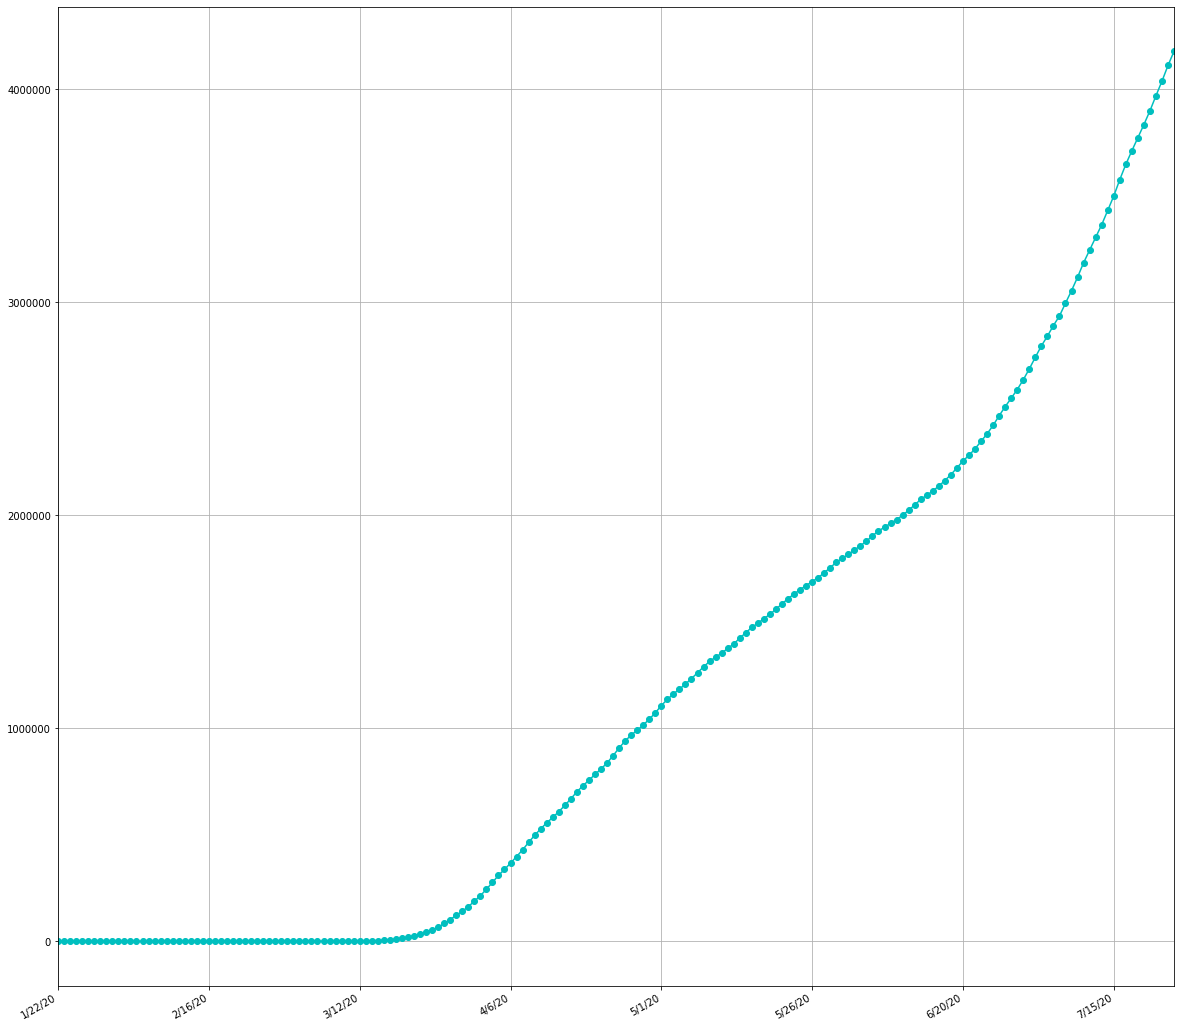

In [5]:
X=grouped.loc['US'].T
X.plot(style='co-',figsize=(20,20),grid = True,subplots=True,animated = False)

**Now i can observe from the above graph that usa was able to control till 22 march but after that there was an exponential growth in covid 19 cases**

## COMPARING THE COUNTRIES LIKE "Australia","China","Italy","US","United Kingdom"

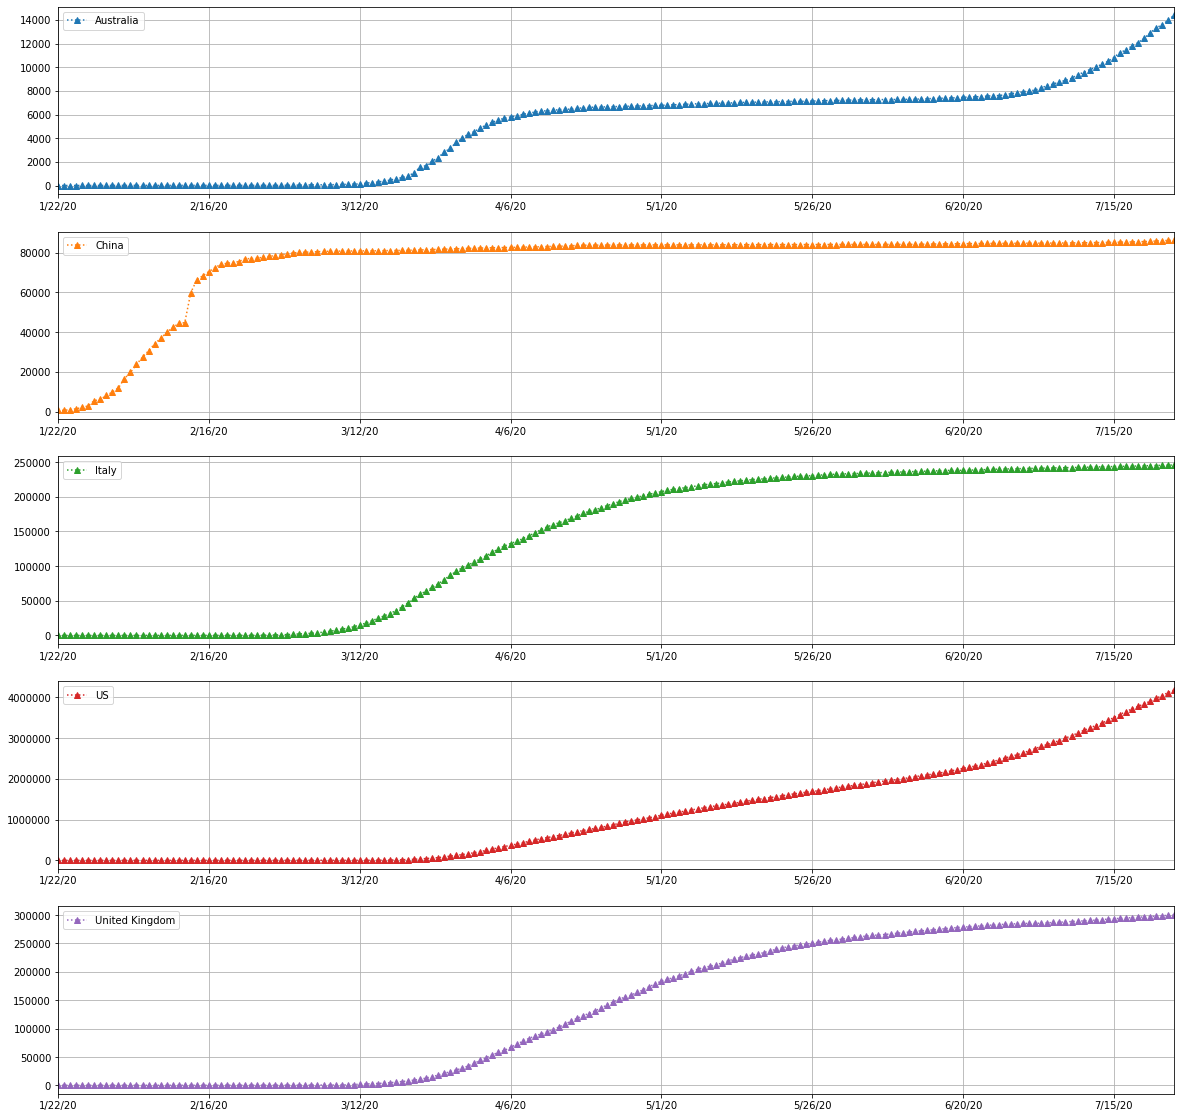

In [6]:
main_plt=grouped.loc[["Australia","China","Italy","US","United Kingdom"]].T
main_plt.plot(subplots=True, legend=True,figsize=(20,20),grid = True,style='^:',sharex = False)
plt.show()

## Australia 
**Had normalised the growth VERY WELL and still able to control the spread ** 
## China
**china saw an outbreak in jan and feb but it was able to control the outbreak in the same month** 

## Italy
**Italy's outbreak seems to be normalised but we cant commit since the plot is still growing**


## US

**USA Is facing major losses due to the fact that the cases are still growing**


## United Kingdom"

**uk can control in coming next month since it looks like their curve is getting flattened soon**

## Normalisation by Population

It would be interesting to see whether the number of cases in China and the US was more per-capita than those in other countries and find which country has the highest number as a proportion of the population. Note, to use the population data 

## READING THE DATASET 

In [7]:
A = pd.read_csv('WPP2019_TotalPopulationBySex.csv')

In [8]:
grouped_1 = A.groupby('Location').sum().T

## EXPLORATORY DATA ANALYSIS AND DATA PREPROCESSING

In [9]:
XYz=grouped.iloc[:,[-1]]
xyz = XYz.dropna()
xyz.rename(columns={grouped.columns[-1]:'Total_Case'}, inplace=True)

In [10]:
TOTAL_POPULATION = grouped_1.T['PopTotal']
total_population = TOTAL_POPULATION.to_frame().T
total_population.rename(columns={'United States of America': 'US'}, inplace=True)
total_population = total_population.T
type(total_population)

pandas.core.frame.DataFrame

In [11]:
total_population.reset_index()

,Location,PopTotal
0,Afghanistan,6.376846e+07
1,Africa,2.486424e+09
2,African Group,2.753551e+08
3,African Union,2.754555e+08
4,African Union: Central Africa,3.633273e+07
5,African Union: Eastern Africa,8.019165e+07
6,African Union: Northern Africa,3.313635e+07
7,African Union: Southern Africa,3.746624e+07
8,African Union: Western Africa,8.832856e+07
9,"African, Caribbean and Pacific (ACP) Group of ...",2.488279e+08


## JOINING THE DATAFRAME 

In [12]:
df = total_population.join(xyz)

In [13]:
df['PopTotal'] = df['PopTotal'].astype(float)

## CASES PER MILLION 

In [14]:
df['CASES_PER_MILLION'] = ((df['Total_Case']/df['PopTotal'])*1000000)
df = df.dropna()

## comparing china and usa 

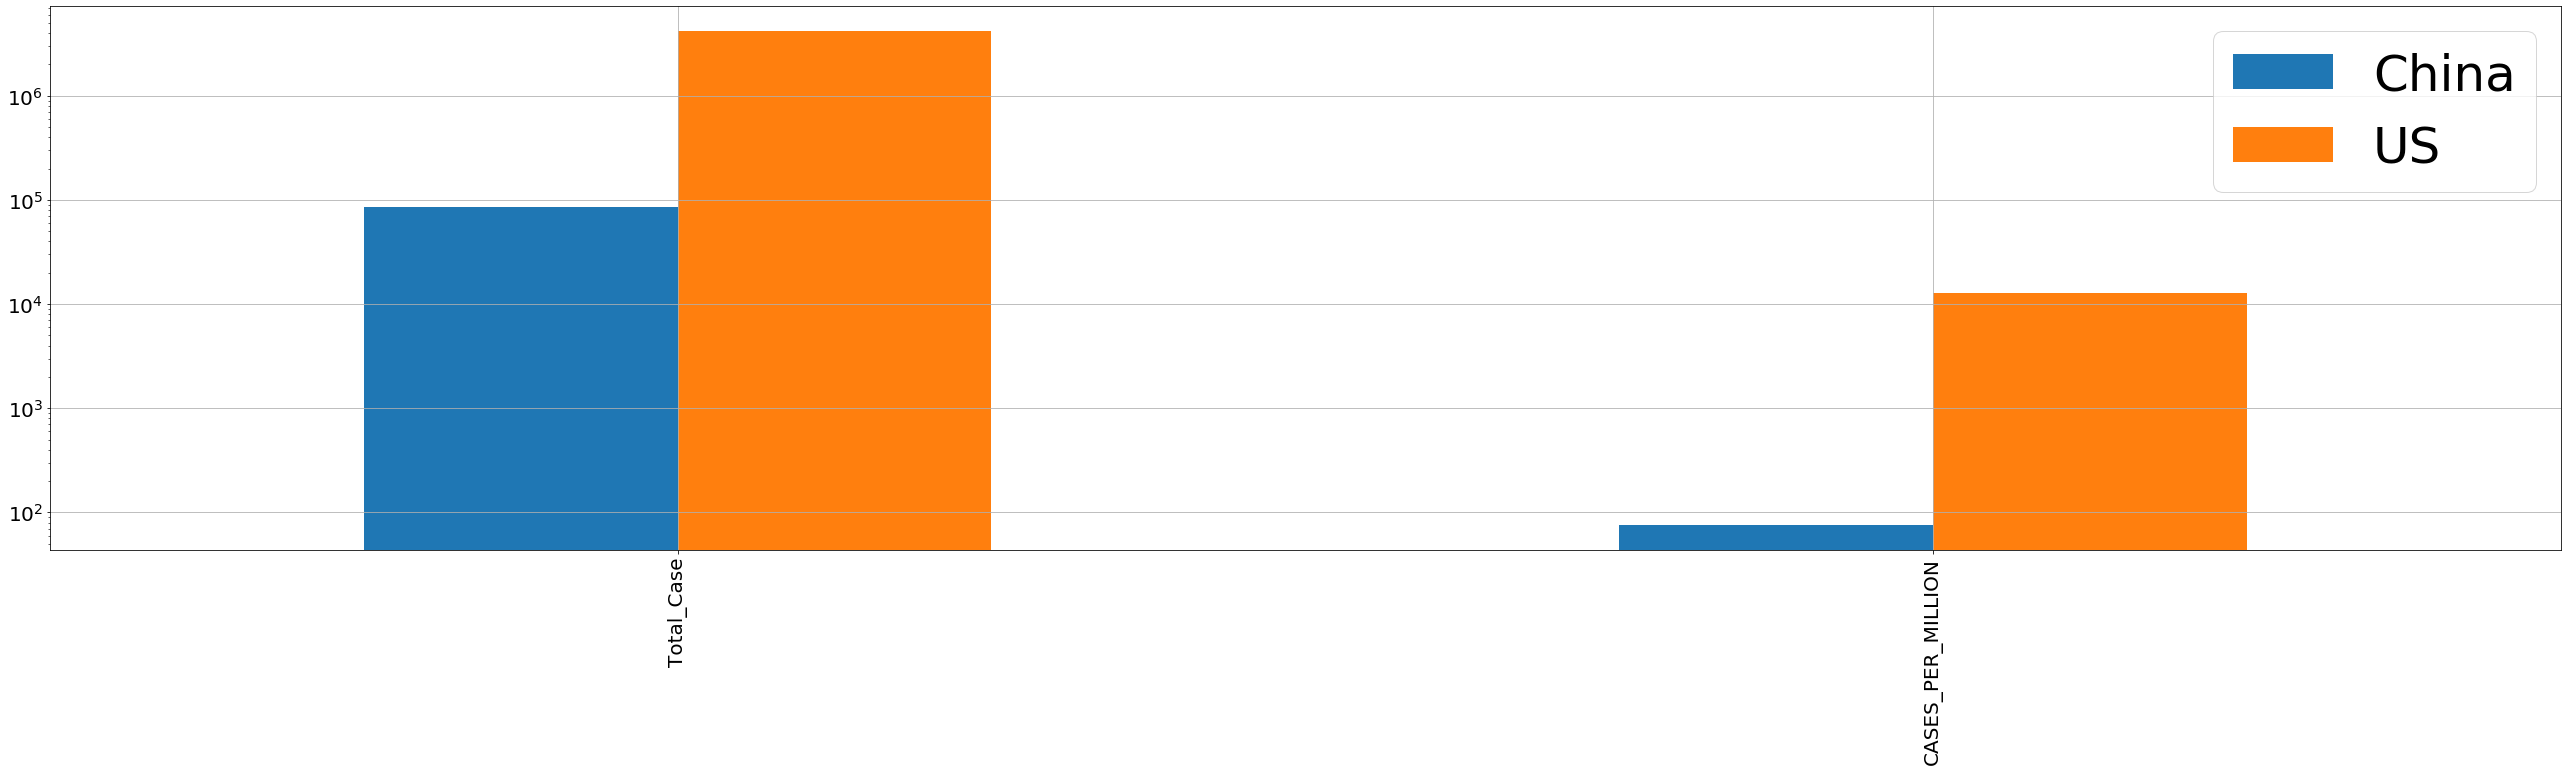

In [25]:
China= df.loc['China',:].T
USA = df.loc['US',:].T
China = China.to_frame()
USA = USA.to_frame()
XYZ = China.join(USA)
XYZ = XYZ.drop(['PopTotal'])
XYZ.plot(x=None, y=None, kind='bar',figsize=(45,10), grid=True, legend=True,  fontsize=20,logy = True)
plt.legend(prop={'size': 50})

we can see from the graph that the total cases and cases per million both are more in china as compared to usa 

## comparing china and usa with other countries 

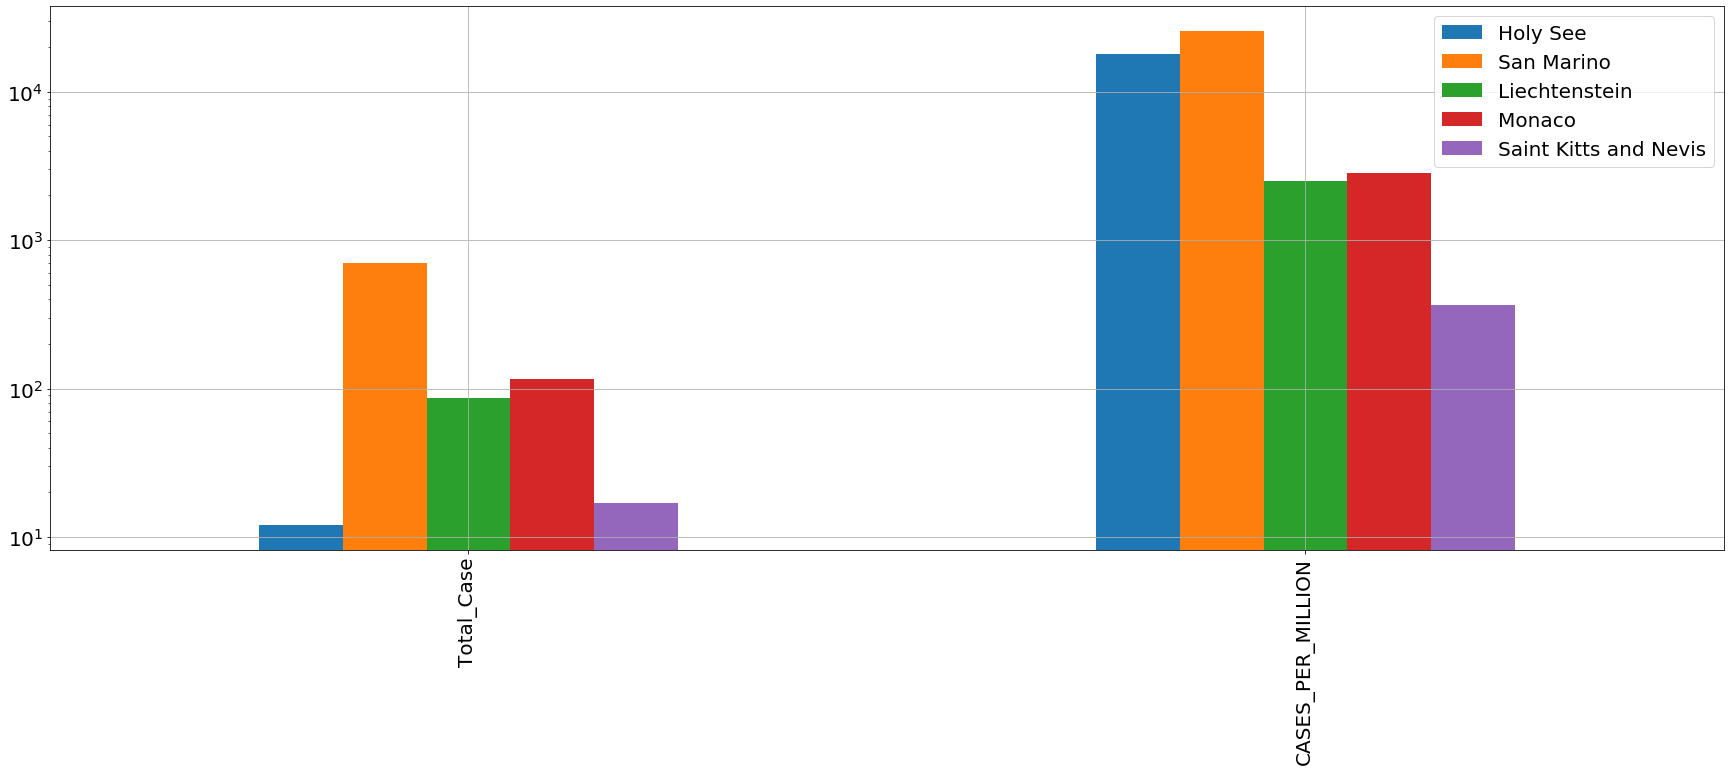

In [27]:
OTHERS = df.sort_values(by = 'PopTotal', ascending=True).head(5)
#OTHERS.plot (legend=True,grid = True,style='-s',figsize=(20,20),subplots = True,sharex = False )
OTHERS=OTHERS.T.drop(['PopTotal'])
#OTHERS = OTHERS.T
#Variable = OTHERS.ed Kingdom"]].T
OTHERS.plot(x=None, y=None, kind='bar',figsize=(30,10), grid=True,  fontsize=20,logy = True)
plt.legend(prop={'size': 20})

**san marino** is top of the chart in both cases means it was most effected amoung less densely populated places.

## A Predictive Model

It is well understood that the spread of the virus follows an exponential pattern. This is because each infected person infects more than one new person on average, leading to exponential growth.  This is why the key to stopping the growth of the pandemic is to reduce the number of people infected by stopping contact and isolating infected poeple. 

An exponential curve has the equation $y = e^{mx}$. It can be converted to a linear relationship by taking the logarithm of each side: $log(y) = mx$.  This means that we can fit a linear regression model to the data as long as we take the log of the number of cases. 

Select a country with a clear exponential curve (for example, the US) and build a linear regression model to predict the log of the number of case.  Test how well the model fits the data. 

Now, select the data from China. This should show some divergence from the model since they have managed to slow the growth of cases.  Can you show from the model that China's data does not show exponential growth?   If China had not acted to stop the virus, how many cases would there be now according to this simple model? 

Can you use this metric to identify countries where the virus is under control and those where it is not? 

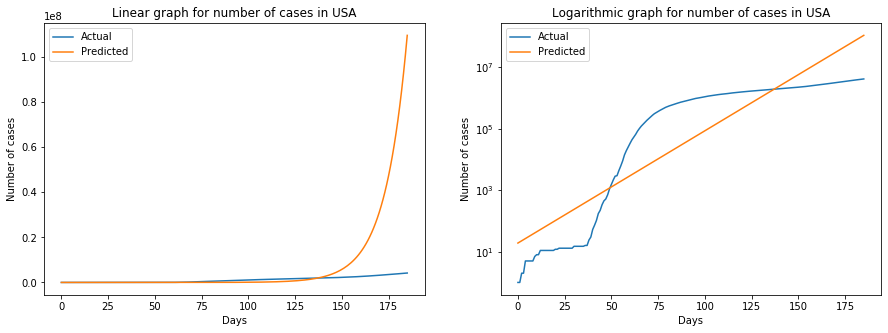

In [28]:
X = np.arange(len(grouped.loc['US'].T)).reshape(-1,1)
y = grouped.loc['US'].T.values
estimator = LinearRegression(normalize = True)
estimator.fit(X,np.log(y))
y_pred = np.exp(estimator.predict(X)) 
plt.figure(figsize=(15,5)) 
 
plt.subplot(1,2,1)
plt.plot(y) 
plt.plot(y_pred) 
plt.title("Linear graph for number of cases in USA")
plt.ylabel("Number of cases")
plt.xlabel("Days")
plt.legend(["Actual","Predicted"]) 
 
plt.subplot(1,2,2) 
plt.plot(y) 
plt.plot(y_pred) 
plt.title("Logarithmic graph for number of cases in USA") 
plt.ylabel("Number of cases")
plt.xlabel("Days")
plt.legend(["Actual","Predicted"])
plt.yscale('log')

**Both graphs represent exactly the same data.  In other words, they are there quantitatively equivalent**

In [29]:
print("R-squared: ", r2_score(y,(y_pred)))
print("R-squared: ", r2_score(np.log(y),np.log(y_pred)))

R-squared:  -255.46489264585546
R-squared:  0.7998551412640216


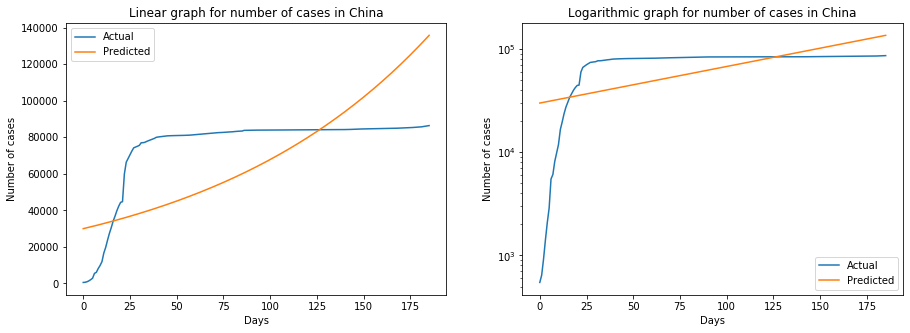

In [30]:
X = np.arange(len(grouped.loc['China'].T)).reshape(-1,1)
y = grouped.loc['China'].T.values
estimator = LinearRegression(normalize = True)
estimator.fit(X,np.log(y))
y_pred = np.exp(estimator.predict(X)) 
 
plt.figure(figsize=(15,5)) 
 
plt.subplot(1,2,1)
plt.plot(y)
plt.plot(y_pred)
plt.title("Linear graph for number of cases in China") 
plt.ylabel("Number of cases") 
plt.xlabel("Days") 
plt.legend(["Actual","Predicted"]) 
 
plt.subplot(1,2,2)
plt.plot(y)
plt.plot(y_pred)
plt.title("Logarithmic graph for number of cases in China")
plt.ylabel("Number of cases")
plt.xlabel("Days")
plt.legend(["Actual","Predicted"]) 
plt.yscale('log')

In [31]:
print("R-squared: ", r2_score(y,(y_pred)))
print("R-squared: ", r2_score(np.log(y),np.log(y_pred)))

R-squared:  -0.5175234769567427
R-squared:  0.2595914200818389


## WHAT WOULD BE  THE EFFECT  IF CHINA  WAS NOT ABLE TO STOP COVID 19 

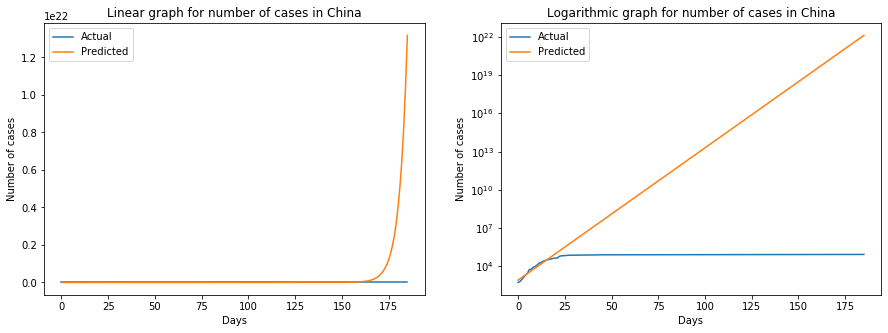

In [32]:
estimator.fit(X[:20],np.log(y[:20]))
y_pred = np.exp(estimator.predict(X)) 
 
plt.figure(figsize=(15,5)) 
 
plt.subplot(1,2,1)
plt.plot(y)
plt.plot(y_pred)
plt.title("Linear graph for number of cases in China")
plt.ylabel("Number of cases") 
plt.xlabel("Days") 
plt.legend(["Actual","Predicted"]) 
 
plt.subplot(1,2,2)
plt.plot(y)
plt.plot(y_pred)
plt.title("Logarithmic graph for number of cases in China")
plt.ylabel("Number of cases") 
plt.xlabel("Days") 
plt.legend(["Actual","Predicted"]) 
plt.yscale('log')

In [33]:
print("R-squared: ", r2_score(y,(y_pred)))
print("R-squared: ", r2_score(np.log(y),np.log(y_pred)))

R-squared:  -5.255457228020913e+33
R-squared:  -633.4168021178334


## THEORY ABOUT R SQUARE
R squared is the proportion of the variance in the dependent variable that is predictable
from the independent variable. When predictions are worse than using simple mean, 
we have R squared to be negative.The R-squared value R 2 is always between 0 and 1 inclusive. Perfect positive linear association. The points are exactly on the trend line.

## Conclusion

Our above portfolio is bases on the spread of coronavirus cases in the world.We have use some techniques to analyse the dataset of the increasing number of cases in the world.
From the above analysis, we can interpret that:-

1.Coronavirus is deadly virus that is increases day by day, 
till now the only solution of this virus is social distancing 
we can see from our model, the cases in China decreases when 
they adopt social distancing measure.

2.We have also compared the cases on Country based and
find out which Country has maximum number of per million 
cases.We have used Normalization technique and can see 
that US has maximum number of cases toady but they have 
minimum per million cases.So we can say that the country that has more population will have minimum per million cases
to the country that have minimum population has maximum per million cases.